In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [15]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [4 2 3 6 3 8 4 0 8 5]


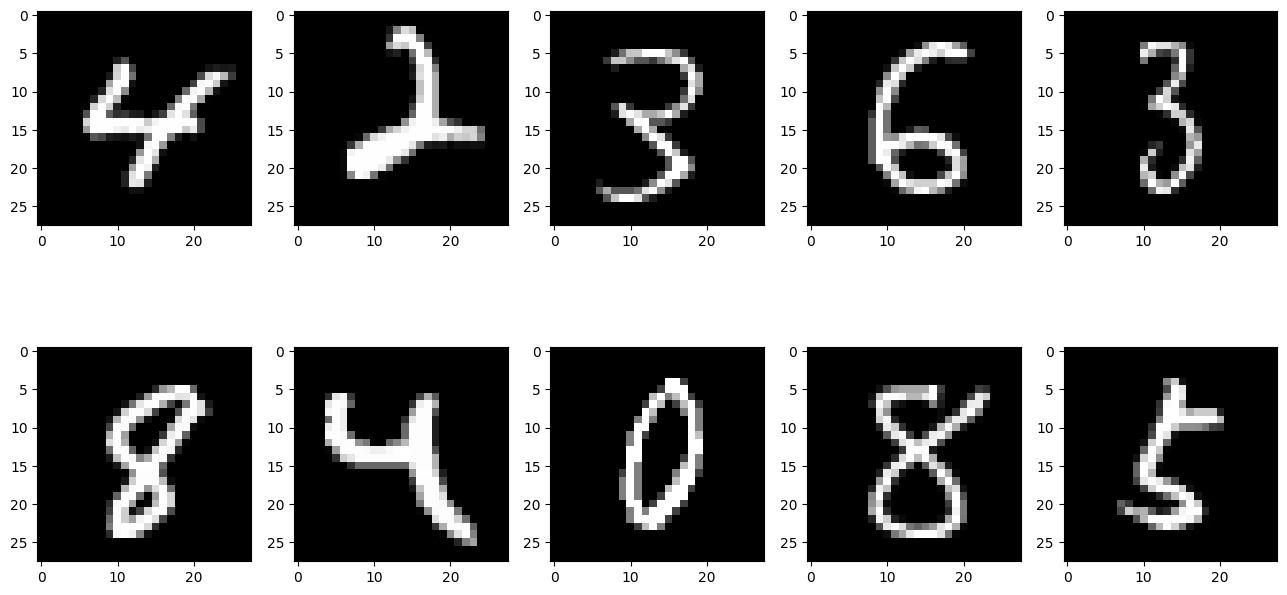

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ', train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')
plt.show()

Pre-processing stage

In [17]:
# Normalize the data
new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

# Convert target labels to one-hot encoding
new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [18]:
# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# Add L1 and L2 regularization to the dense layers to prevent overfitting
# and increase the number of units for better performance
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))  # Increased units and added L1 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))   # Added L2 regularization
model.add(Dense(32, activation='relu'))  # Retained original layer without regularization for diversity
model.add(Dense(10, activation='softmax'))

# Compile the model with different hyperparameters to improve performance
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Display the model's architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [20]:
# Train the model with an increased number of epochs to improve accuracy
train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=128, validation_split=0.2)  # Added validation_split and increased epochs

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7721 - loss: 2.4915 - val_accuracy: 0.9159 - val_loss: 0.6913
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9169 - loss: 0.6540 - val_accuracy: 0.9364 - val_loss: 0.5280
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9351 - loss: 0.5223 - val_accuracy: 0.9453 - val_loss: 0.4586
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9437 - loss: 0.4596 - val_accuracy: 0.9513 - val_loss: 0.4305
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9494 - loss: 0.4138 - val_accuracy: 0.9540 - val_loss: 0.3867
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9528 - loss: 0.3792 - val_accuracy: 0.9574 - val_loss: 0.3531
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9580 - loss: 0.3522 - val_accuracy: 0.9589 - val_loss: 0.3461
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9580 - loss: 0.3349 - val_accuracy: 0

Plot the loss and accuracy graphs

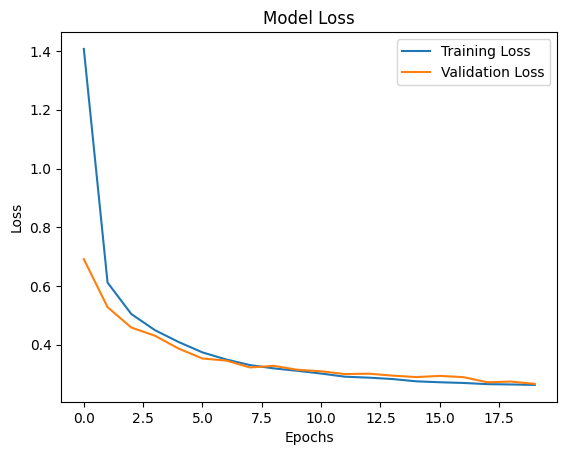

In [21]:
# Plot training loss
plt.plot(train_info.history['loss'], label='Training Loss')
plt.plot(train_info.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

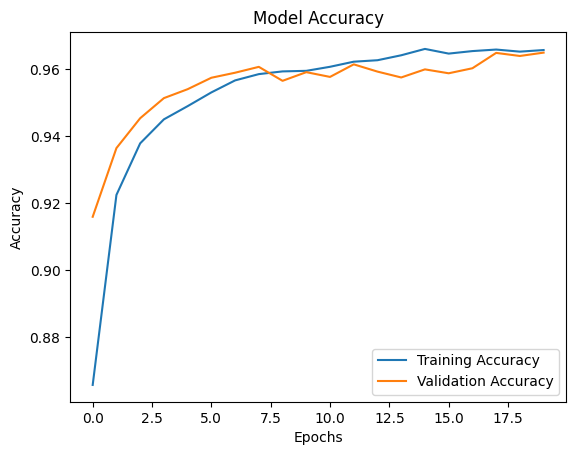

In [22]:
# Plot training accuracy
plt.plot(train_info.history['accuracy'], label='Training Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

Test the performance of Model

In [23]:
# Evaluate the model on the test data
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.2749
Loss of the Test dataset is: 0.2586286962032318
Accuracy of the test dataset is: 0.964900016784668


Save the model weights

In [24]:
# Save model weights
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

Visualize class-wise performance using a confusion matrix

In [25]:
# Visualize class-wise performance using a confusion matrix
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(new_test_target, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Compute confusion matrix

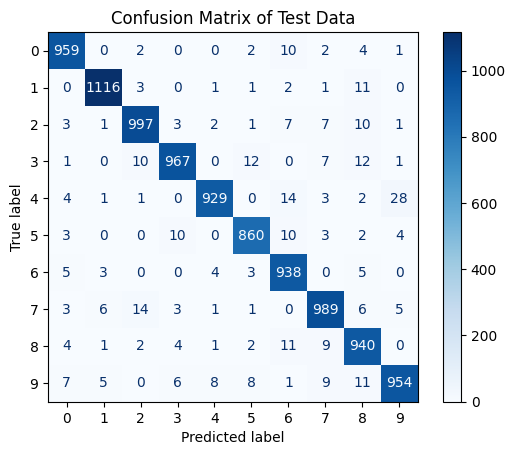

In [26]:
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Test Data')
plt.show()